### 05. Softmax Classification
    - Binary Classification : 이진 클래스 분류 
    - Softmax Regression : 다중 클래스 분류 

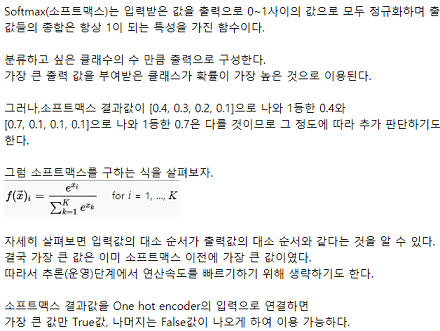

In [2]:
from IPython.display import Image
Image('img/theory_softmax.PNG')

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

- Softmax 

In [11]:
z = torch.FloatTensor([1,2,3])
## z에 대한 argmax는 ([0, 0, 1])이 될 것이다. (3이 최대값이므로)
## But z에 대한 softmax는 각각이 max가 될 확률을 합계 1이 되도록 표현한다. 
hypothesis = F.softmax(z, dim=0)
print(hypothesis)
print(hypothesis.sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


- Loss function (cross-entropy)

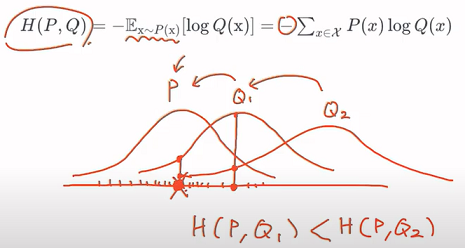

In [14]:
## P로부터 샘플링 하여, 다른 분포 Q1 Q2에 대입하여 P와의 차이를 비교한다. 
## 예) P와 Q1의 차이가 P와 Q2의 차이보다 작으므로 Q1을 선택하게 되는데, 이런식으로 엔트로피를 최소화 시키는 것이 목표다. 
from IPython.display import Image
Image('img/cross_entrophy.PNG')

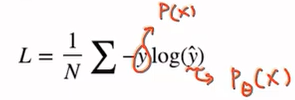

In [16]:
Image('img/loss_function_cross_entrophy.PNG')

In [17]:
z = torch.rand(3, 5, requires_grad=True)   ## 3x5의 난수행렬 생성 
hypothesis = F.softmax(z, dim=1)
y = torch.randint(5, (3,)).long()          ## 5컬럼에 대해 3개의 랜덤 정수값 생성
print(hypothesis)
print(y)  ## 출력값은 index임, 즉 1 = 0.2377 / 4 = 0.2295 / 0 = 0.1895 

tensor([[0.1338, 0.2377, 0.1729, 0.2056, 0.2500],
        [0.1375, 0.3236, 0.1565, 0.2295, 0.1528],
        [0.1895, 0.1689, 0.1371, 0.2621, 0.2424]], grad_fn=<SoftmaxBackward>)
tensor([1, 4, 0])


In [20]:
## cross-entropy를 구하기 위해 one-hot coding 등 복잡한 수식이 필요하나, 
## 토치에서 제공하는 F.cross_entropy(z, y)로 간단히 해결 가능함 
F.cross_entropy(z, y)

tensor(1.6595, grad_fn=<NllLossBackward>)

- 실전 코딩 

In [22]:
## data set 
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)     ## 정답의 index 이므로, 정수(long type)으로 

print(x_train)
print(y_train)

tensor([[1., 2., 1., 1.],
        [2., 1., 3., 2.],
        [3., 1., 3., 4.],
        [4., 1., 5., 5.],
        [1., 7., 5., 5.],
        [1., 2., 5., 6.],
        [1., 6., 6., 6.],
        [1., 7., 7., 7.]])
tensor([2, 2, 2, 1, 1, 1, 0, 0])


In [23]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # 4가지 input값을 받아, 3종류로 분류 

    def forward(self, x):
        return self.linear(x)

In [25]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr= 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.3f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.115
Epoch  100/1000 Cost: 0.665
Epoch  200/1000 Cost: 0.573
Epoch  300/1000 Cost: 0.517
Epoch  400/1000 Cost: 0.471
Epoch  500/1000 Cost: 0.431
Epoch  600/1000 Cost: 0.394
Epoch  700/1000 Cost: 0.358
Epoch  800/1000 Cost: 0.322
Epoch  900/1000 Cost: 0.286
Epoch 1000/1000 Cost: 0.251
